# PROJECT NAME: PRCP-1007-Liver Patient Prediction

# PROJECT TEAM ID: PTID-CDS-FEB-23-1476

# Business Case:- Predicting if a patient have Liver Disease or not

## Data Information:

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The &quot;Target&quot; column is a class label used to divide groups into liver patients (liver disease) or not        (no disease). This data set contains 441 male patient records and 142 female patient records.
Any patient whose age exceeded 89 is listed as being of age "90".

## Problem:

Patients with Liver disease have been continuously increasing because of excessive consumption of
alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was
used to evaluate prediction algorithms in an effort to reduce burden on doctors.

I found the data that I needed from: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1007-LiverPatientPred.zip

# Importing Libraries

In [5]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn import tree

# Loading the DataSet

In [9]:
# Here, We are loading the dataset by using the pandas

df=pd.read_csv('Indian Liver Patient Dataset.csv')
df

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Female,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Domain Analysis 

### 1) Age:
   Tells the Current age of the person.
### 2) Gender of the Patient:        
   Shows which gender does the patient belongs to.
### 3)Total Bilirubin:
   This test Measures the amount of bilirubin present in our blood.Bilirubin is an yellowish pigment that is made during the breakdown of red blood cells.Bilirubin passes through the liver and is eventually excreted out of the body.It’s used to help find the cause of health conditions like jaundice,anemia and liver disease.
### 4) Direct Bilirubin:
   In the Liver,bilirubin is changed into a form that your body can get rid of.This is called Conjugated bilirubin or Direct bilirubin.This bilirubin travells from the liver into the small intestine.
        
  Bilirubin attached by the liver to glucuronic acid,a glucose-derived acid, is called direct or conjugated,bilirubin. Bilirubin not attached to glucuronic acid is called indirect.
       
   In an adult,normal values of direct bilirubin are from 0–0.4 milligrams per deciliter (mg/dL).Normal values of total bilirubin are from 0.3–1.0 mg/dL.
### 5) Alkaline Phosphatase:
   An alkaline phosphatase (ALP) test measures the amount of ALP in your blood.ALP is an enzyme found in many parts of your body.Each part of your body produces a different type of ALP.Most ALP is found in your liver,bones,kidneys and digestive system.
   Alkaline phosphatase is an enzyme in a person’s blood that helps break down proteins.Normal range of ALP is 44 to 147 international units per liter (IU/L).

   Higher-than-normal levels of ALP in your blood may indicate a health concern with your liver or gallbladder.This could include a blockage in your bileducts,gallstones,cirrhosis,liver cancer and some forms of hepatitis.

   Having lower-than-normal ALP levels in your blood can indicateTrusted Source a protein deficiency or Wilson’s disease.It may also signal malnutrition,which could be caused by celiac disease or an insufficient amount of certain vitamins and minerals.
### 6) Alanine Aminotransferase:
   The Alanine Aminotransferase (ALT) test is a blood test that checks for liver damage.This test is done to find out if a disease,drug or injury has damaged your liver.This enzyme is found mainly in your liver and kidney.
       
   Smaller amounts of  ALT are in Kidneys and in other organs.Liver damage generally causes an increase in ALT levels.The ALT test can evaluate the levels of ALT in your bloodstream.

   The normal value for ALT in blood for people without risk factors for liver disease ranges from 29 to 33 international units per liter (IU/L) for males and 19 to 25 IU/L for females.
### 7) Aspartate Aminotransferase:
   Aspartate aminotransferase(AST) is an enzyme that is mostly found in the liver,but also in muscles and other organs in the body.AST blood test measures the amount of AST in blood.High level of AST may be a sign of liver diseases. An enzyme is a protein that helps trigger chemical reactions that your body needs to function.

   In a newborn Baby Healthy range is 47–150 U/L and Atypical range is <47 or >150 U/L

   In children's Healthy Range is 9–80 U/L and Atypical Range is <9 or >80 U/L

   In adult's men Healthy Range is 14–20 U/L and Atypical range is <14 or >20 U/L

   In adult's women Healthy Range is 10–36 U/L and Atypical range is <9 or >36 U/L
### 8) Total Protein:
   Total protein test measures the amount of protein in your blood.Proteins are important for the health and growth of the body's cells and tissues.The test can help diagnose a number of health conditions,including: kidney disease,liver disease.
### 9) Albumin:
   Albumin is a protein made by your liver.Albumin enters your bloodstream and helps keep fluid from leaking out of your blood vessels into other tissues.It is also carries hormones,vitamins,and enzymes throughout your body.
### 10) Albumin and Globulin Ratio:
   These are two types of proteins.The normal range is over 1,usually 1 to 2w.
### 11) Target:
   It is split into two sets. [ 1):patient with liver disease, 2):patient with no liver disease].

# Basic Checks

In [11]:
# Displaying the first 5 rows of the dataset using the 'head()' function where 5 is given as a parameter

df.head()

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
# Displaying the last 5 rows of the dataset using the 'tail()' function where 5 is given as a parameter

df.tail()

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Female,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [15]:
# Printing all the column from the dataframe

df.columns

Index(['Age_of_the_patient', 'Gender_of_the_patient', 'Total_ Bilirubin',
       'Direct_Bilirubin', 'Alkaline_Phosphatase', 'Alanine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protein', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [17]:
# Printing the number of rows and columns using the "shape()" function

df.shape

(583, 11)

- Shape of the dataset is 583 rows and 11 columns

In [19]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          583 non-null    int64  
 1   Gender_of_the_patient       583 non-null    object 
 2   Total_ Bilirubin            583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphatase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protein               583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [21]:
# Checking for null values

df.isnull().sum()

Age_of_the_patient            0
Gender_of_the_patient         0
Total_ Bilirubin              0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protein                 0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

- There are 4 null values in the Albumin and Globulin Ratio column

In [23]:
# It will discribe all the characters

df.describe(include=['O'])

,Gender_of_the_patient
count,583
unique,2
top,Male
freq,417


In [25]:
# checking for the duplicated values

df.loc[df.duplicated()]

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1
164,39,Male,1.9,0.9,180,42,62,7.4,4.3,1.38,1
201,49,Male,0.6,0.1,218,50,53,5.0,2.4,0.90,1


- There are 8 rows of duplicated data which we have to remove.

In [27]:
# Getting Statistical data from the dataset

df.describe()

,Age_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Exploratory Data Analysis

# Univariate Analysis

<Figure size 1000x500 with 0 Axes>

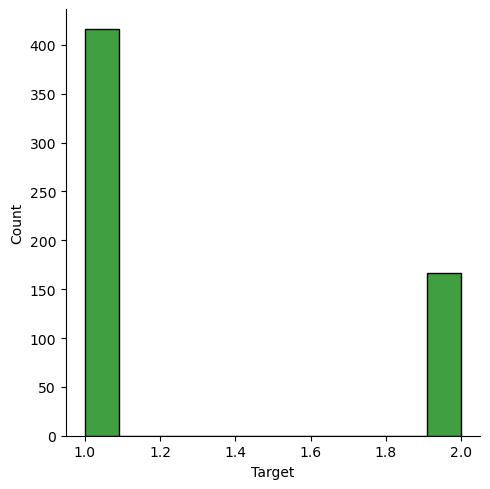

In [29]:
# Using the distplot to count  the number patients present

# Setting up the figure size
plt.figure(figsize=(10,5))

# Setting value for the bar graph
sns.displot(df['Target'],color='green')

plt.show()

 <li>Since 1 represents patients with liver disease and 2 represents patients without liver disease, from the above graph we can say that the patients with liver disease is more.

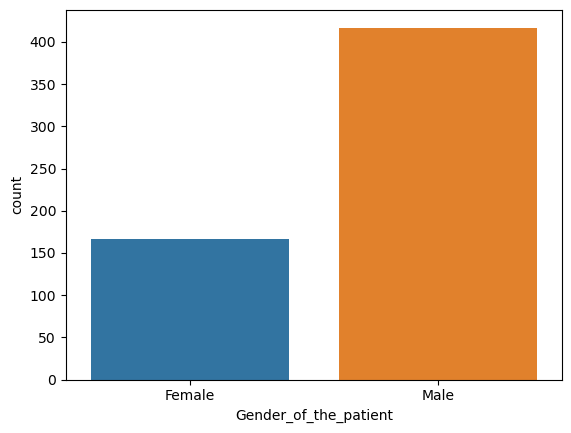

In [31]:
# Count plot for categorical data

sns.countplot(x=df['Gender_of_the_patient'])
plt.show()

<li>There are 417 number of Males and 166 number of Females in this dataset.

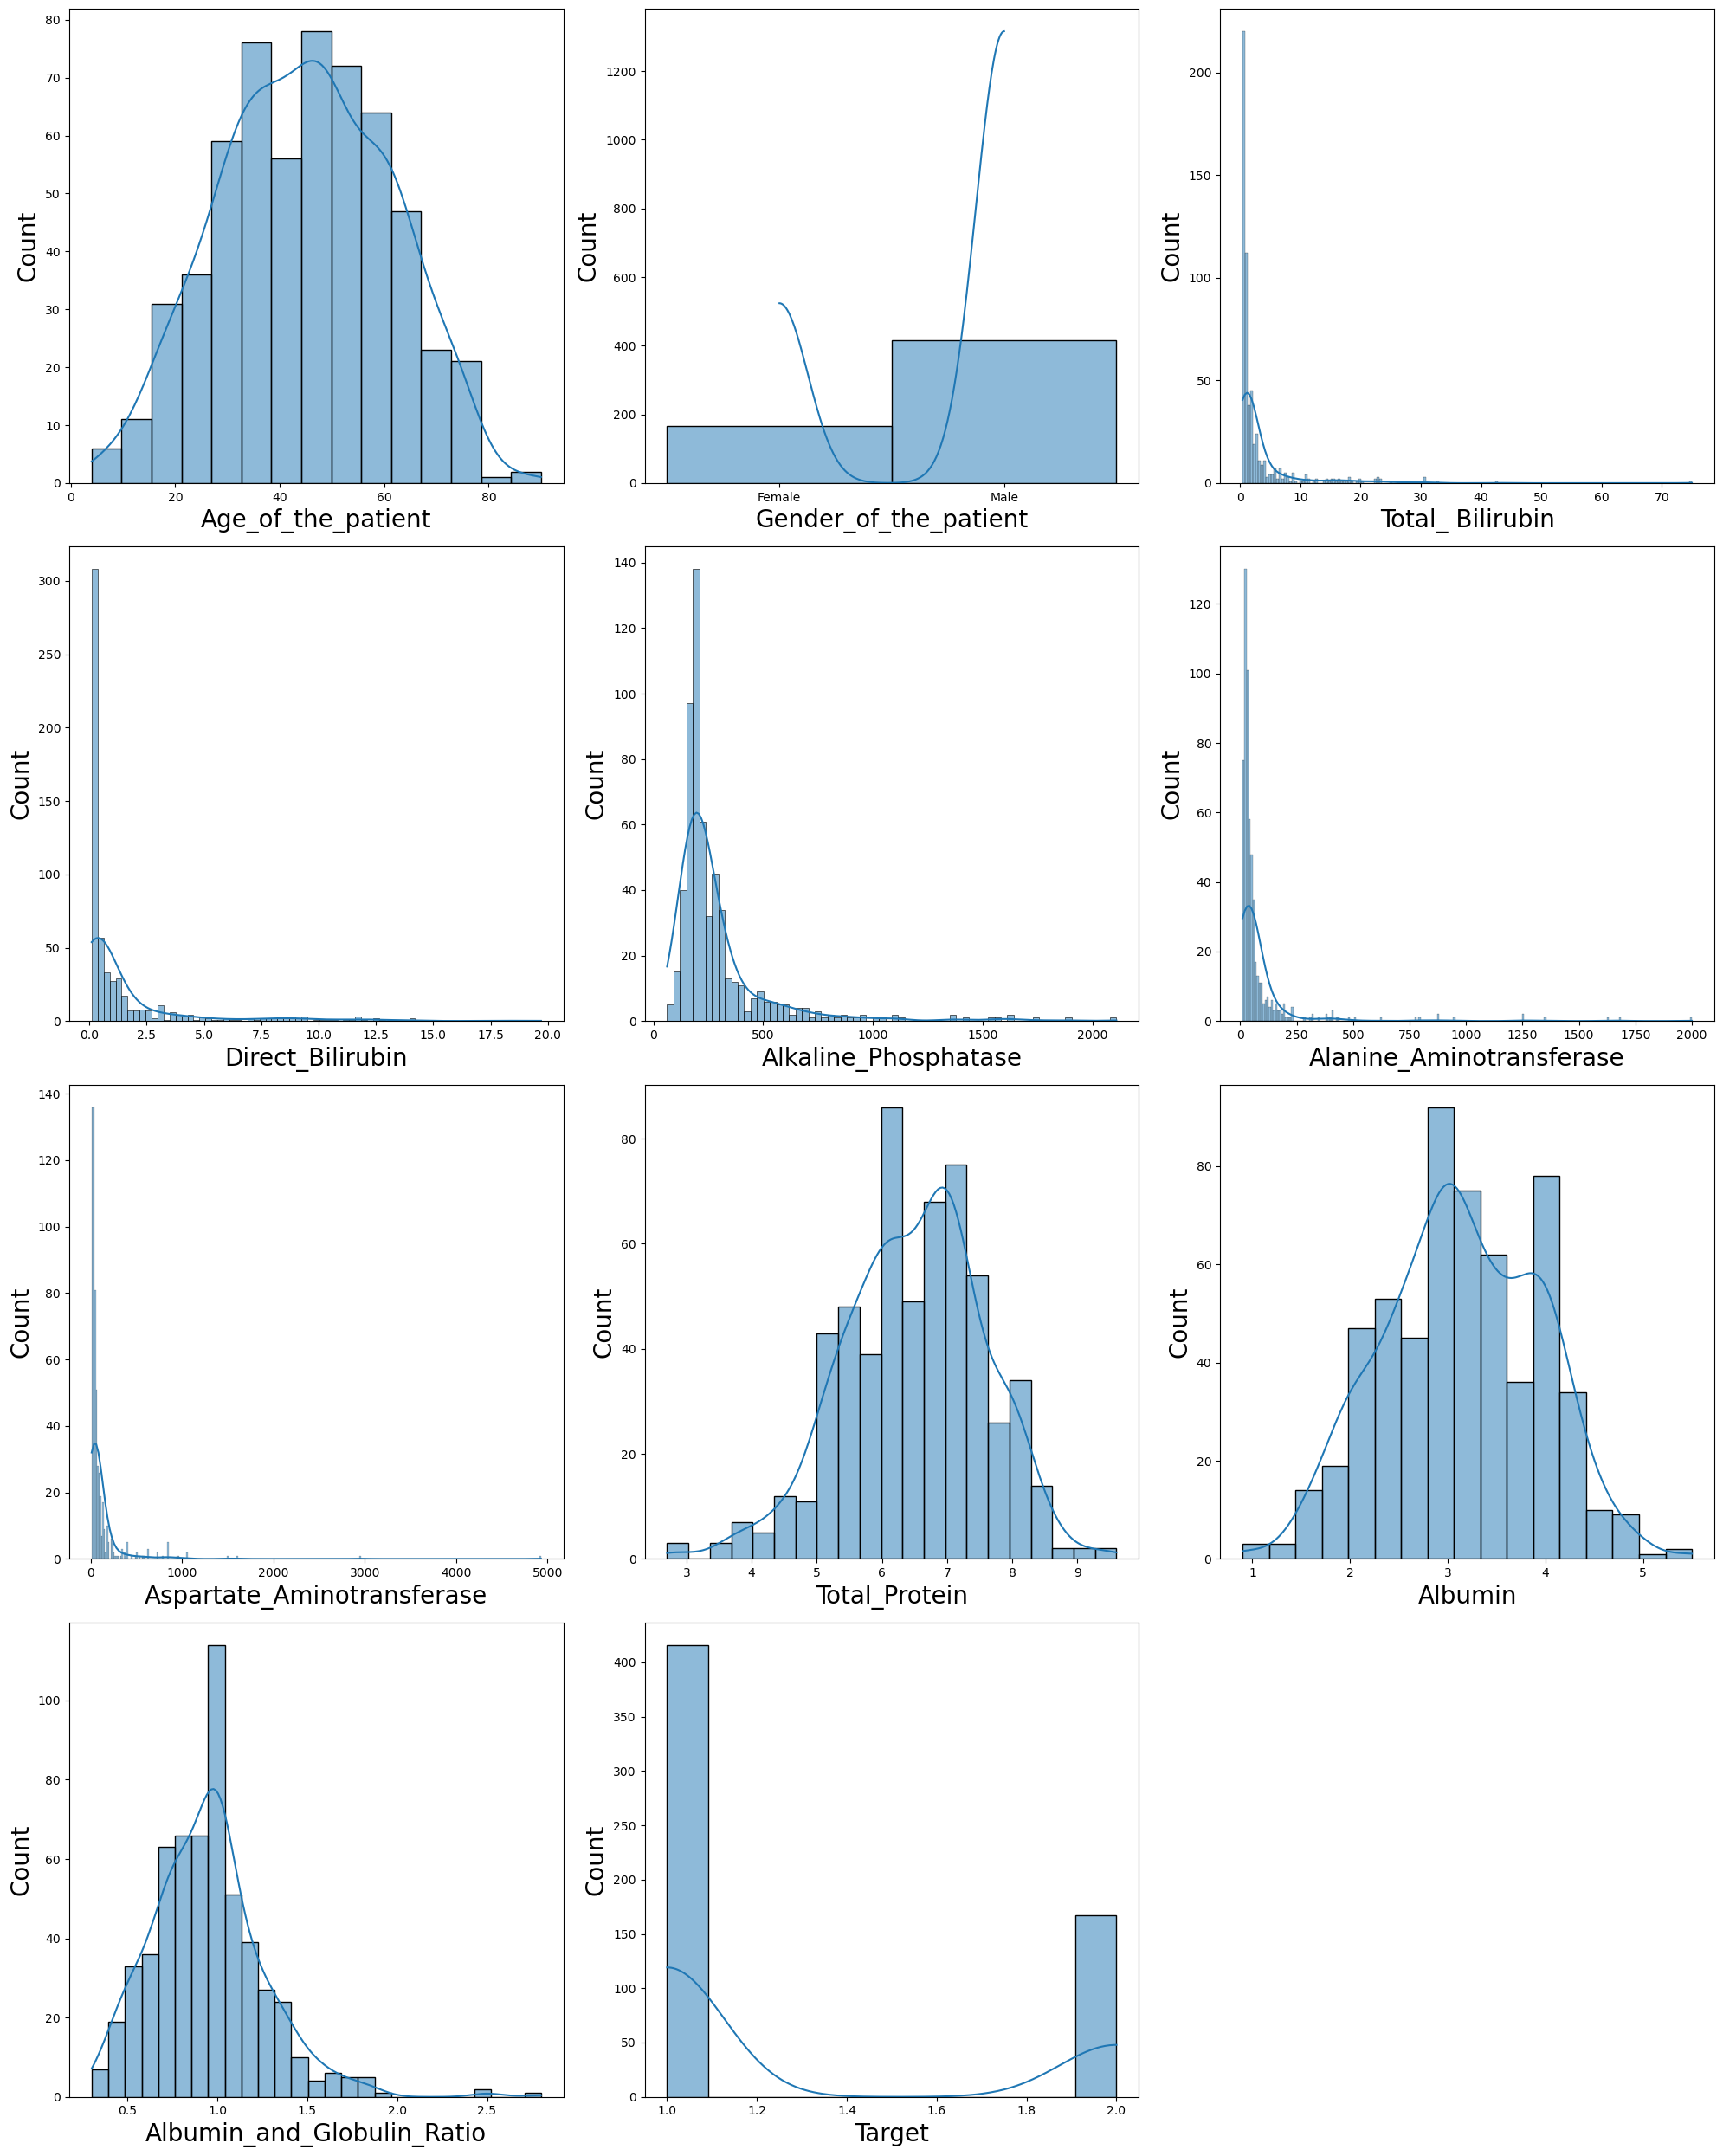

In [33]:
plt.figure(figsize=(20,25))
plotnumber = 1#counter

for column in df:#accessing the columns 
    plt.subplot(4,3,plotnumber)
    sns.histplot(x=df[column],kde=True)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

# Insights from Univariate Analysis

- Maximum of the patients lie in the age range of 35 to 60 years.
- From the countplot graph we can see that there are more male patients than female patients.
- Total Bilirubin, Total Bilirubin, Alkaline phosphatase, Alanine Aminotransferase, Aspartate Aminotransferase and Albumin and Globulin ratio shows right skewed graph.
- In Total Bilirubin,Patients that have total bilurubin under the range of 0 to 1 unit is more.
- In Direct Bilirubin,most patient falls under 0 to 0.9 unit range.
- In Alkaline phosphatase,most patient falls under 20 to 100 approx units range.
- In Aspartate Aminotransferase, maximum number of patients are in the range of 0 to 100 units range.
- Total protein is mostly normally distributed with little left skewed.Most patients have protein within the range of 6 to 7.5     units.
- Albumin is normally distributed.Most patients have Albumin within the range of 3 to 4 units.
- In albumin and globulin ratio,most patients have this ratio 1.0 unit.

# Bivariate Analysis

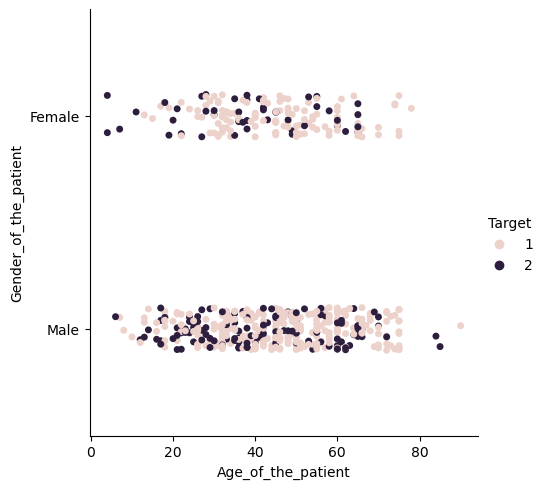

In [35]:
sns.catplot(x="Age_of_the_patient", y="Gender_of_the_patient", hue="Target", data=df)

<li>Males whose age is above 35 are more prone to Liver Disease.

<Axes: xlabel='Total_ Bilirubin', ylabel='Direct_Bilirubin'>

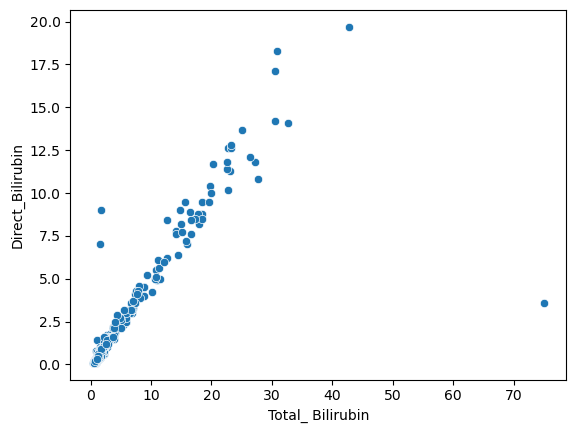

In [37]:
sns.scatterplot(x='Total_ Bilirubin',y='Direct_Bilirubin', data=df)

<li>Total Bilirubin and Direct Bilirubin are highly related.

<Axes: xlabel='Aspartate_Aminotransferase', ylabel='Alanine_Aminotransferase'>

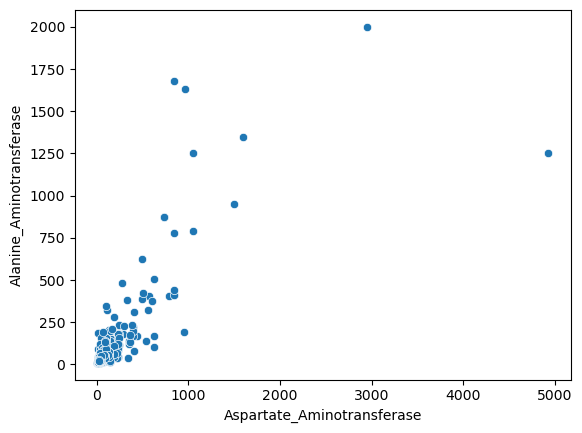

In [39]:
sns.scatterplot(y='Alanine_Aminotransferase',x='Aspartate_Aminotransferase', data=df)

<li>Alanine Aminotransferase and Aspartate Aminotransferase are weakly correlated to each other.

<Axes: xlabel='Albumin', ylabel='Total_Protein'>

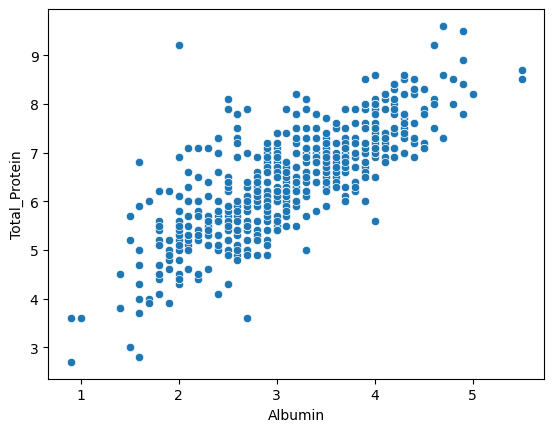

In [41]:
sns.scatterplot(y='Total_Protein',x='Albumin', data=df)

<li>Albumin is a protein made by liver, the more amount of albumin indicates a healthy liver, therefore as Albumin increases total protein increases.

# **Data Preprocessing**

In [43]:
# Checking for null values

df.isnull().sum()

Age_of_the_patient            0
Gender_of_the_patient         0
Total_ Bilirubin              0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protein                 0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

### <li>There are 4 null values in Albumin_and_Globulin_Ratio which we have to impute

In [45]:
df['Albumin_and_Globulin_Ratio'].mean()

0.9469468267581475

In [47]:
df['Albumin_and_Globulin_Ratio'].median()

0.93

In [49]:
#Imputting null values

df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

#Since Albumin_and_Globulin_Ratio is a skewed so we are imputting median to the null values.

In [51]:
df.isnull().sum()

Age_of_the_patient            0
Gender_of_the_patient         0
Total_ Bilirubin              0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protein                 0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

<li>we have sucessfully imputed all the null values.

# Conversion of categorical columns in to numerical columns

# Encoding the Gender column

In [53]:
# Encoding Gender Column by Label encoding.

le=LabelEncoder()
df['Gender_of_the_patient']=le.fit_transform(df['Gender_of_the_patient'])
df

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Encoding the Target column

In [55]:
df['Target']=df['Target'].replace(2,0)
df

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [57]:
df.Target.value_counts()

1    409
0    166
Name: Target, dtype: int64

In [59]:
df.head()

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Duplicated values

In [61]:
#Checking for duplicated data

df[df.duplicated()]

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target


In [63]:
#Dropping the duplicated rows

df.drop_duplicates(inplace=True)  

In [65]:
df

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Handling Outliers

### Checking for Outliers

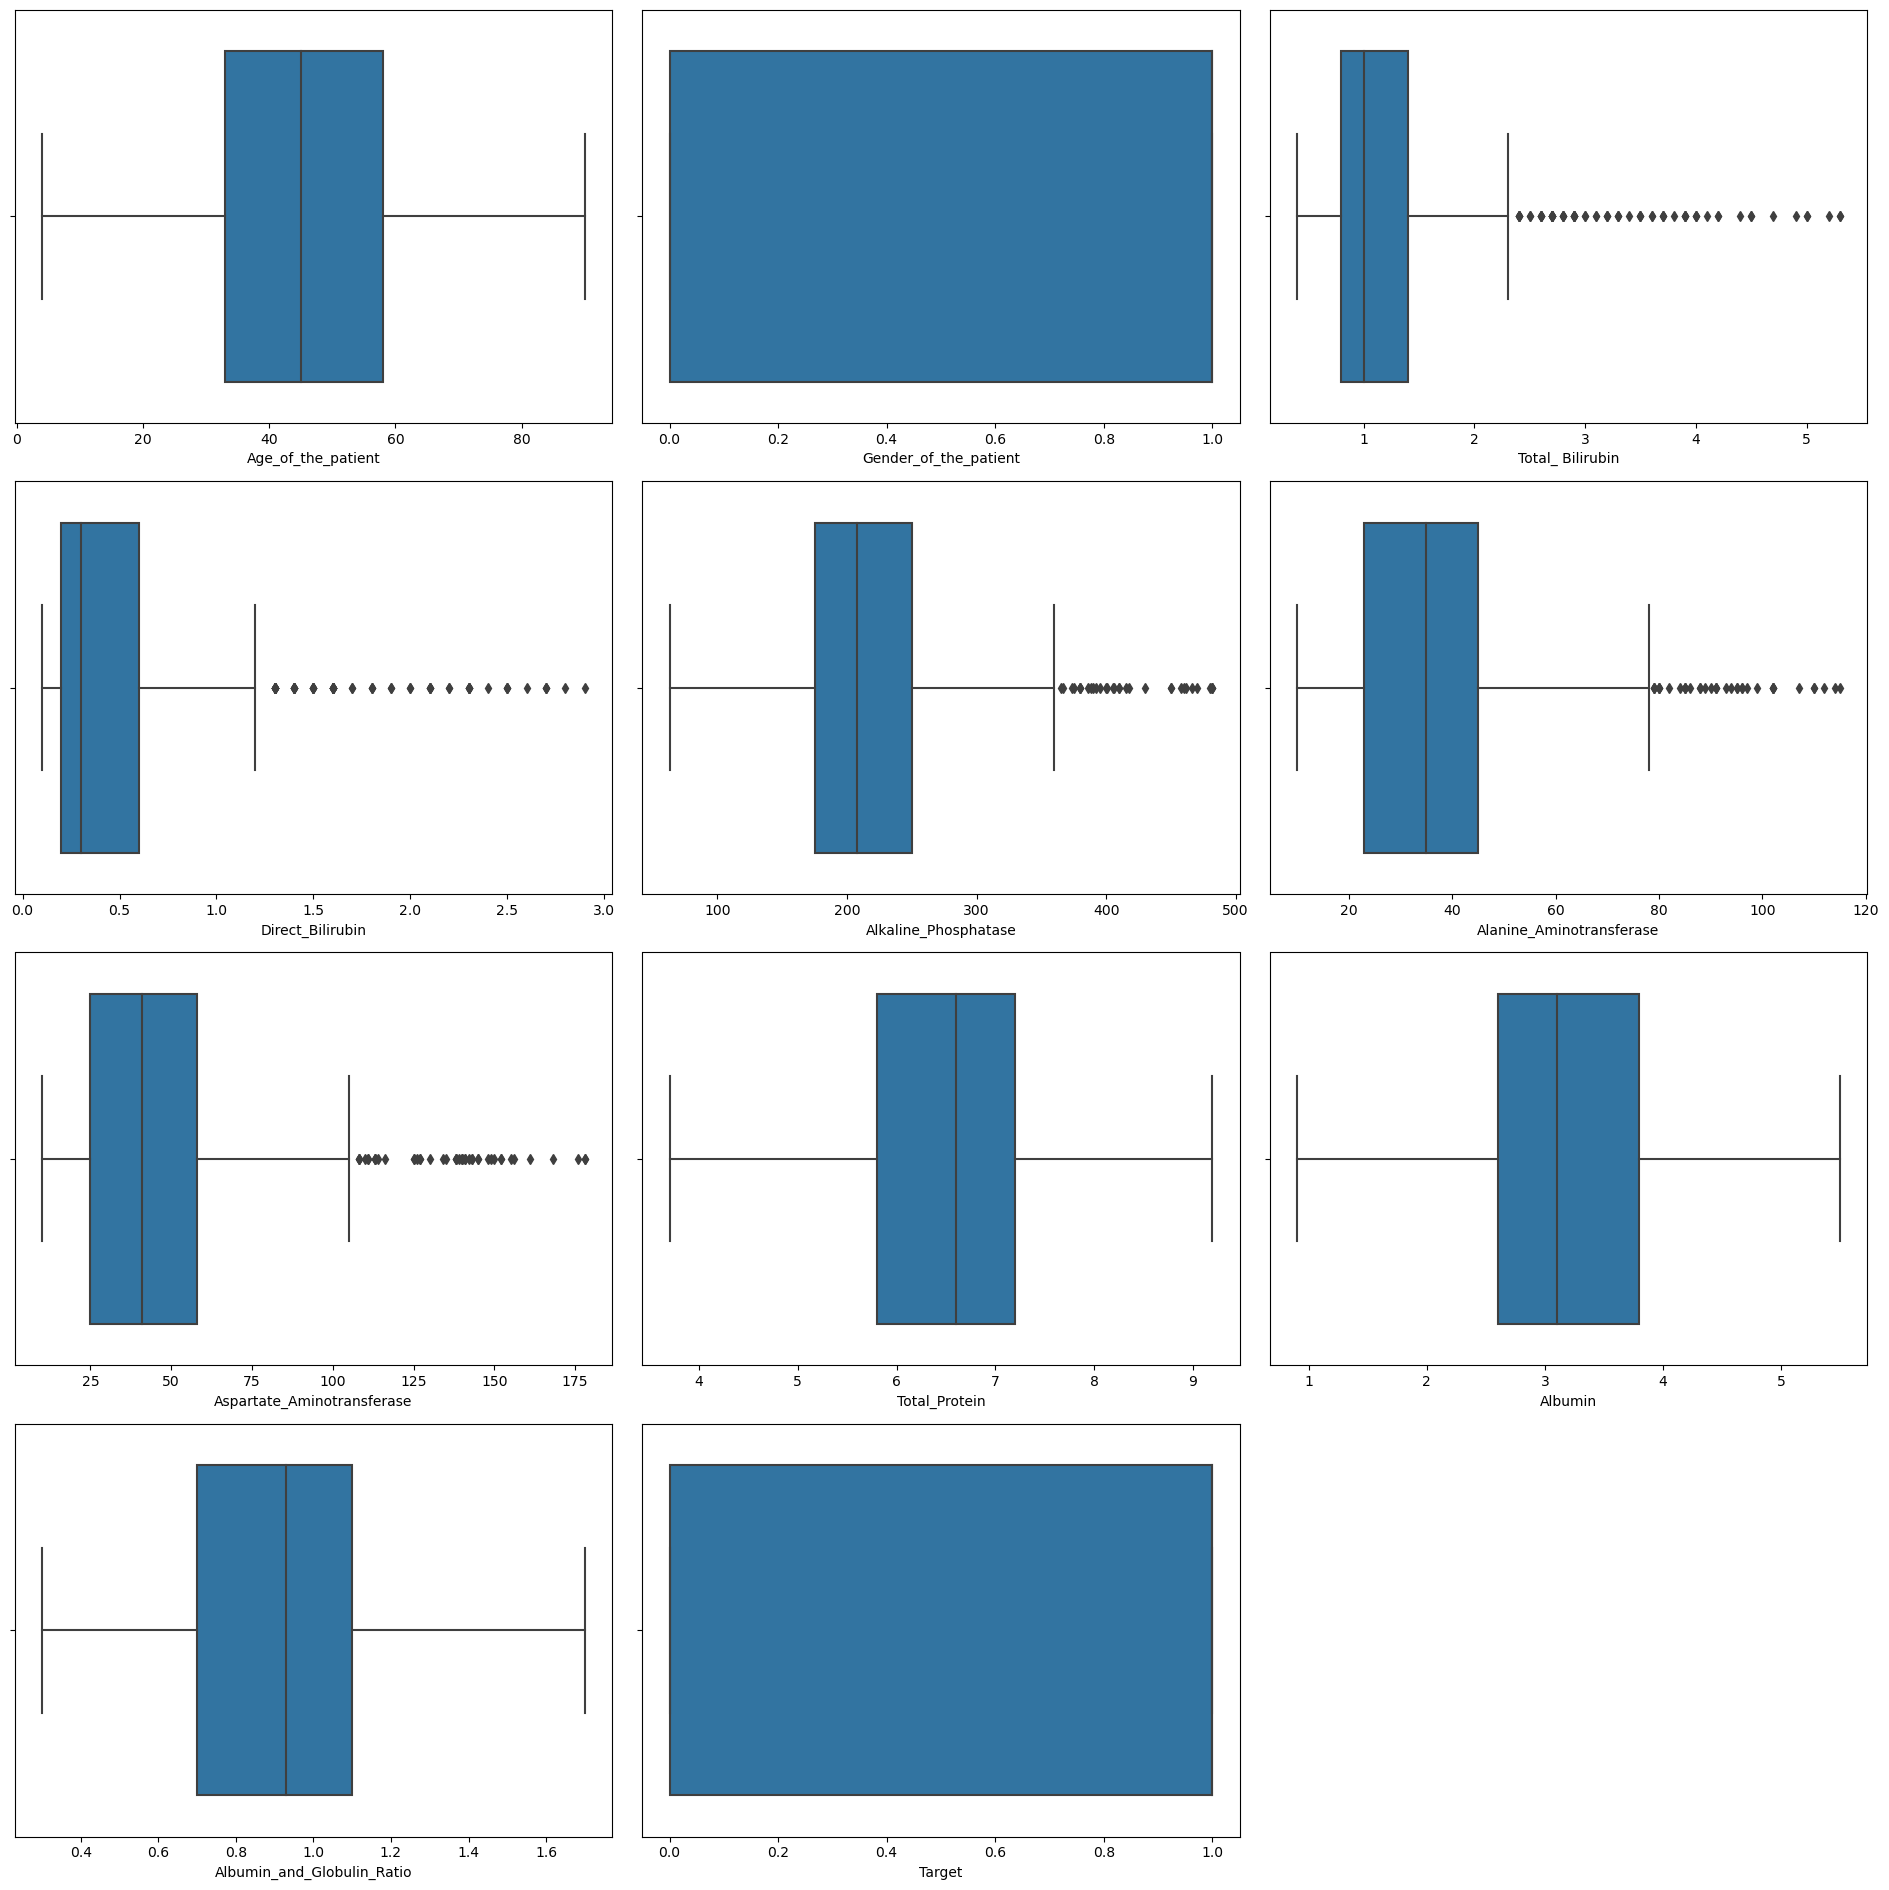

In [67]:
plt.figure(figsize=(19,19))
plotnumber=1
for i in df:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(data=df,x=i)
    plotnumber=plotnumber+1
plt.tight_layout()

### Imputing the Outliers

In [69]:
df.columns

Index(['Age_of_the_patient', 'Gender_of_the_patient', 'Total_ Bilirubin',
       'Direct_Bilirubin', 'Alkaline_Phosphatase', 'Alanine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protein', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [71]:
column_outlier =['Age_of_the_patient', 'Total_ Bilirubin', 'Alkaline_Phosphatase',
       'Direct_Bilirubin','Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protein', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target',
       'Gender_of_the_patient']

In [73]:
 for column in column_outlier:
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
  
   upper_limit = Q3 +1.5*IQR
   lower_limit = Q1 - 1.5*IQR
   median = float(df[column].median())
   df[column] = np.where(df[column] > upper_limit,median,df[column])
   df[column] = np.where(df[column] < lower_limit,median,df[column])

# Feature Selection

In [75]:
df

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,1.0,0.3,208.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,1.0,0.3,208.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,1.0,0.3,195.0,27.0,59.0,7.3,2.4,0.40,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,1.0,0.5,0.1,208.0,20.0,34.0,5.9,1.6,0.37,0.0
579,40.0,1.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10,1.0
580,52.0,0.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00,1.0
581,31.0,1.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00,1.0


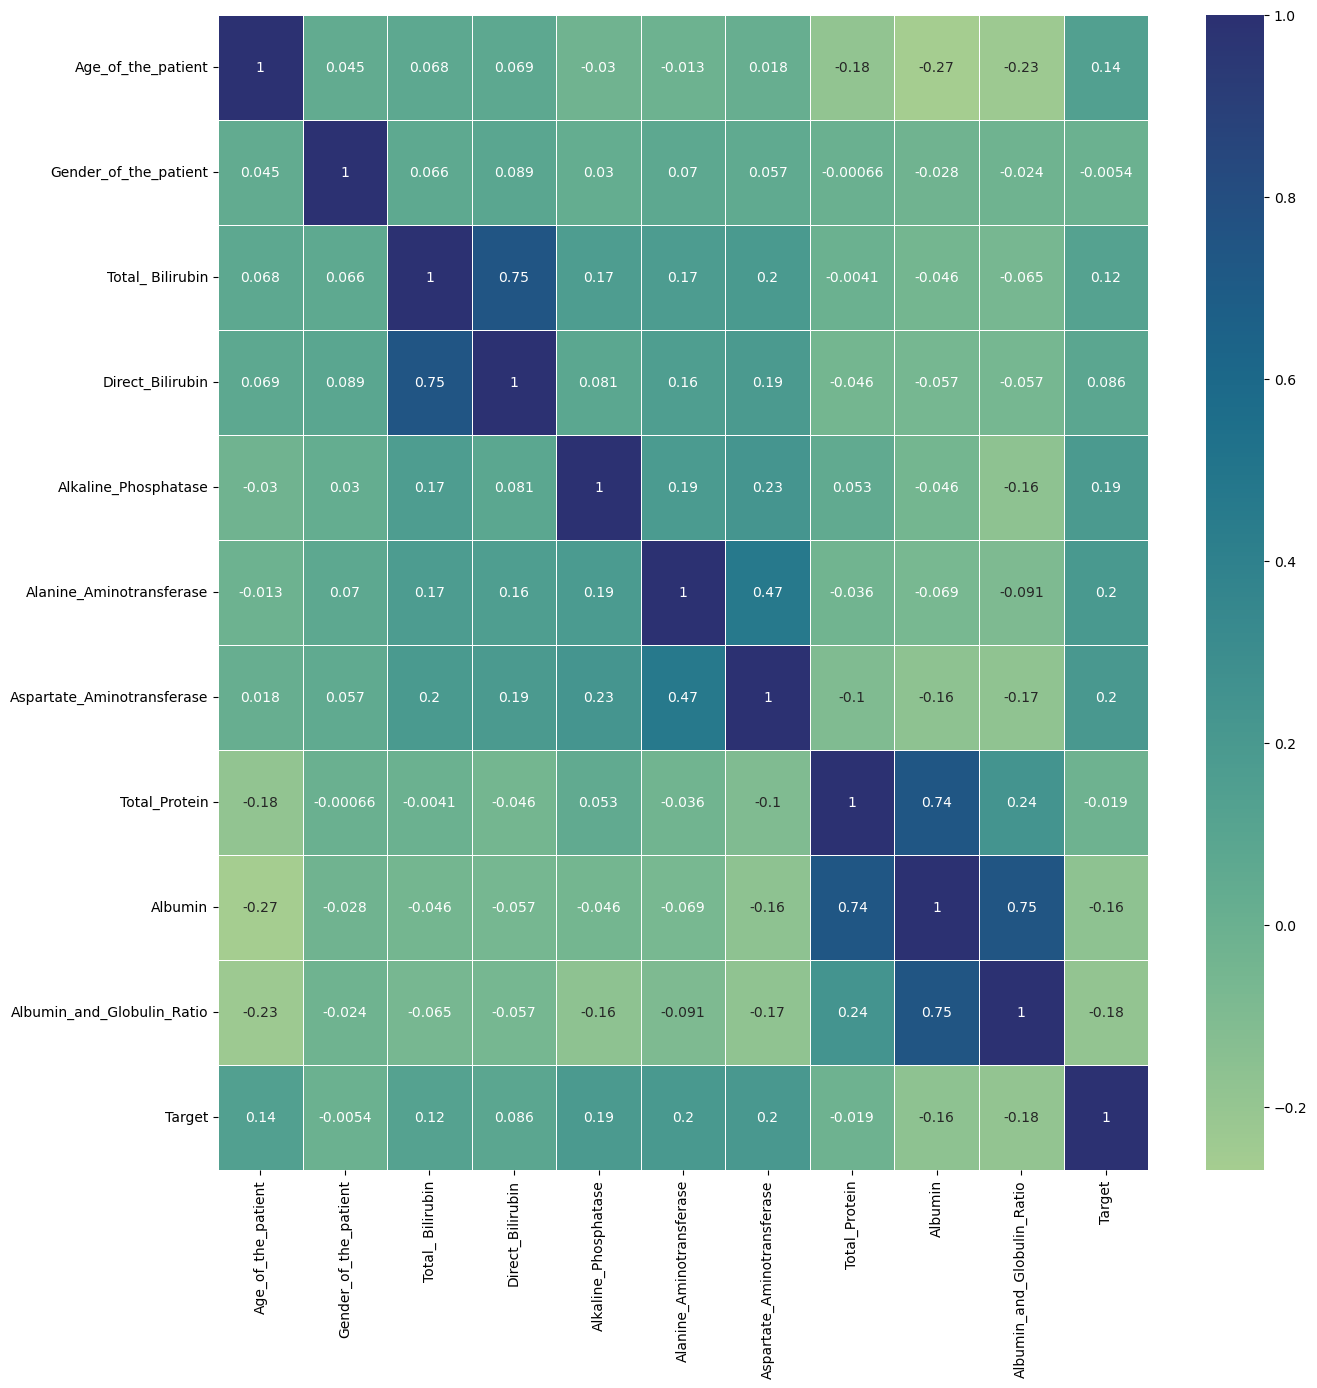

In [77]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='crest',linewidth=.5)
plt.show()

<li>It gives the correaltion between the features.
<li>There are no independent Variables that are strongly correlated to each other that is why we are not removing any independent variable.

In [79]:
# Showing the correlation between all the columns

corr=df.corr()
corr

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
Age_of_the_patient,1.000000,0.044563,0.068149,0.069397,-0.030292,-0.012708,0.018461,-0.179871,-0.268916,-0.233442,0.139531
Gender_of_the_patient,0.044563,1.000000,0.066427,0.088784,0.029883,0.070076,0.057344,-0.000658,-0.028369,-0.023656,-0.005386
Total_ Bilirubin,0.068149,0.066427,1.000000,0.745715,0.168475,0.173119,0.196195,-0.004071,-0.046202,-0.064818,0.120455
Direct_Bilirubin,0.069397,0.088784,0.745715,1.000000,0.080923,0.161785,0.189873,-0.045995,-0.056583,-0.056582,0.086087
Alkaline_Phosphatase,-0.030292,0.029883,0.168475,0.080923,1.000000,0.185954,0.229709,0.052989,-0.046426,-0.164101,0.187590
Alanine_Aminotransferase,-0.012708,0.070076,0.173119,0.161785,0.185954,1.000000,0.468102,-0.035609,-0.069486,-0.091317,0.201199
Aspartate_Aminotransferase,0.018461,0.057344,0.196195,0.189873,0.229709,0.468102,1.000000,-0.102283,-0.164307,-0.170351,0.202594
Total_Protein,-0.179871,-0.000658,-0.004071,-0.045995,0.052989,-0.035609,-0.102283,1.000000,0.740839,0.237408,-0.018725
Albumin,-0.268916,-0.028369,-0.046202,-0.056583,-0.046426,-0.069486,-0.164307,0.740839,1.000000,0.750538,-0.163258
Albumin_and_Globulin_Ratio,-0.233442,-0.023656,-0.064818,-0.056582,-0.164101,-0.091317,-0.170351,0.237408,0.750538,1.000000,-0.184699


# Model Creation

In [81]:
## creating X and y
x=df.drop('Target',axis=1)
y=df.Target#dependent variabel or target 

In [83]:
x

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,1.0,1.0,0.3,208.0,64.0,100.0,7.5,3.2,0.74
2,62.0,1.0,1.0,0.3,208.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,1.0,1.0,0.3,195.0,27.0,59.0,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60.0,1.0,0.5,0.1,208.0,20.0,34.0,5.9,1.6,0.37
579,40.0,1.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10
580,52.0,0.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00
581,31.0,1.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00


In [85]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
578    0.0
579    1.0
580    1.0
581    1.0
582    0.0
Name: Target, Length: 575, dtype: float64

In [87]:
## preparing training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
x_train.head()

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio
70,19.0,0.0,0.7,0.2,186.0,35.0,41.0,5.5,3.0,1.2
239,40.0,1.0,0.9,0.3,196.0,69.0,48.0,6.8,3.1,0.8
65,57.0,1.0,1.4,0.7,208.0,62.0,88.0,5.6,2.5,0.8
444,61.0,1.0,0.8,0.2,163.0,18.0,19.0,6.3,2.8,0.8
62,58.0,1.0,1.0,0.5,158.0,37.0,43.0,7.2,3.6,1.0


In [91]:
x_train.tail()

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio
73,52.0,1.0,0.6,0.1,171.0,22.0,16.0,6.6,3.6,1.20
109,36.0,1.0,0.9,0.1,208.0,25.0,34.0,5.9,2.8,0.90
278,45.0,1.0,2.2,0.8,209.0,25.0,20.0,8.0,4.0,1.00
443,42.0,1.0,0.7,0.2,152.0,35.0,81.0,6.2,3.2,1.06
104,63.0,1.0,0.5,0.1,170.0,21.0,28.0,5.5,2.5,0.80


In [93]:
x_test

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio
159,50.0,1.0,1.2,0.4,282.0,36.0,32.0,7.2,3.9,1.10
121,32.0,1.0,1.0,0.3,290.0,35.0,41.0,6.6,2.8,0.70
253,35.0,1.0,0.6,0.2,180.0,12.0,15.0,5.2,2.7,0.93
416,70.0,1.0,0.6,0.1,208.0,76.0,41.0,6.3,2.7,0.75
286,34.0,0.0,0.8,0.2,192.0,15.0,12.0,8.6,4.7,1.20
...,...,...,...,...,...,...,...,...,...,...
522,46.0,0.0,0.8,0.2,185.0,24.0,15.0,7.9,3.7,0.80
77,68.0,1.0,0.6,0.1,208.0,35.0,41.0,4.6,2.1,0.80
273,30.0,0.0,0.7,0.2,262.0,15.0,18.0,6.6,4.7,1.20
550,46.0,1.0,1.0,0.3,172.0,25.0,41.0,5.6,2.4,0.70


In [95]:
y_train

70     1.0
239    1.0
65     1.0
444    0.0
62     1.0
      ... 
73     1.0
109    0.0
278    1.0
443    1.0
104    1.0
Name: Target, Length: 460, dtype: float64

In [97]:
y_test

159    1.0
121    1.0
253    0.0
416    1.0
286    1.0
      ... 
522    1.0
77     1.0
273    1.0
550    1.0
279    1.0
Name: Target, Length: 115, dtype: float64

In [99]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(460, 10)
(115, 10)
(460,)
(115,)


## Scalling

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [103]:
# We scalled all the columns from the dataset using MinMax Scaler

df[df.columns]=scaler.fit_transform(df[df.columns])

In [105]:
df

,Age_of_the_patient,Gender_of_the_patient,Total_ Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protein,Albumin,Albumin_and_Globulin_Ratio,Target
0,0.709302,0.0,0.157895,0.000000,0.417508,0.088235,0.084211,0.563636,0.521739,0.428571,1.0
1,0.674419,1.0,0.315789,0.181818,0.488215,0.794118,0.947368,0.690909,0.500000,0.314286,1.0
2,0.674419,1.0,0.315789,0.181818,0.488215,0.735294,0.610526,0.600000,0.521739,0.421429,1.0
3,0.627907,1.0,0.315789,0.272727,0.400673,0.058824,0.105263,0.563636,0.543478,0.500000,1.0
4,0.790698,1.0,0.315789,0.181818,0.444444,0.250000,0.515789,0.654545,0.326087,0.071429,1.0
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1.0,0.052632,0.000000,0.488215,0.147059,0.252632,0.400000,0.152174,0.050000,0.0
579,0.418605,1.0,0.105263,0.000000,0.117845,0.367647,0.221053,0.418182,0.500000,0.571429,1.0
580,0.558140,0.0,0.210526,0.090909,0.612795,0.558824,0.410526,0.490909,0.500000,0.500000,1.0
581,0.313953,1.0,0.473684,0.363636,0.407407,0.279412,0.231579,0.563636,0.543478,0.500000,1.0


In [107]:
df.shape

(575, 11)

# Model Evaluation

# 1.Logistic Regression

## Model Creation and Evaluation

In [109]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [111]:
y_pred=lr.predict(x_test)

In [113]:
y_pred_train=lr.predict(x_test)

In [115]:
y_pred

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [117]:
# Checking the confusion matrix for the model

confusion_matrix(y_test,y_pred)

array([[ 6, 27],
       [10, 72]], dtype=int64)

In [119]:
# Checking the Precission Score of the testing data

precision_score(y_test,y_pred)

0.7272727272727273

In [121]:
# Checking the f1-Score of the testing data

f1_score(y_test,y_pred)

0.7955801104972374

In [123]:
# Checking the Accuracy of the testing data

accuracy_score(y_test,y_pred)

0.6782608695652174

In [125]:
# Checking the Recall Score of the testing data

recall_score(y_test,y_pred)

0.8780487804878049

In [127]:
# printing the Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.38      0.18      0.24        33
         1.0       0.73      0.88      0.80        82

    accuracy                           0.68       115
   macro avg       0.55      0.53      0.52       115
weighted avg       0.63      0.68      0.64       115



<li>We are getting a recall score of 87% with the testing data.

# 2.K-Nearest Neighbour

In [129]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [131]:
error_rate

[0.3565217391304348,
 0.3826086956521739,
 0.3217391304347826,
 0.3217391304347826,
 0.3130434782608696,
 0.33043478260869563,
 0.3217391304347826,
 0.30434782608695654,
 0.3391304347826087,
 0.30434782608695654]

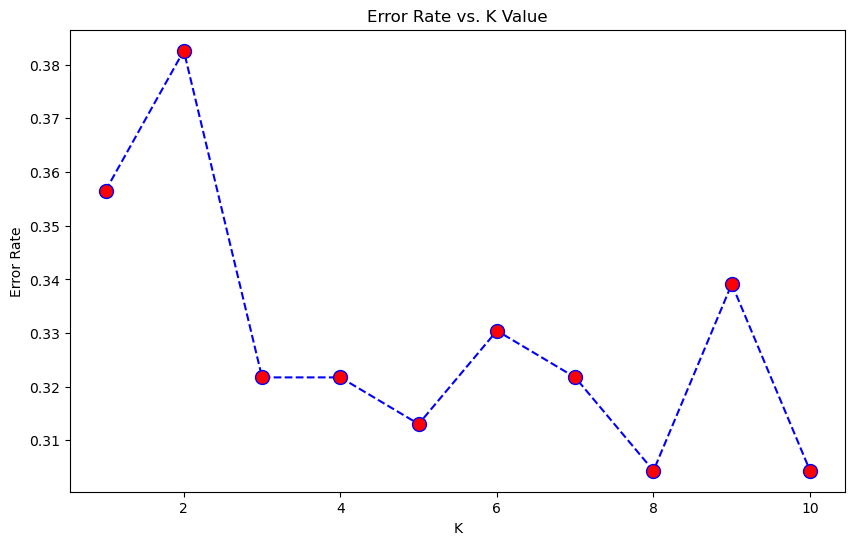

In [133]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [135]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [137]:
# Predict with test data
y_pred = knn1.predict(x_test)

In [139]:
# Checking the Recall Score of the testing data

recall_score(y_test,y_pred)

0.8414634146341463

<li>We are getting a Recall Score of 84% with K Nearest Neighbour for the testing data.
<li>Now we will use hyper parameter tuning to get a higher accuracy.

### Hyper-Parameter Tuning

In [141]:
# Using the Grid Search CV Method

from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}

model = KNeighborsClassifier()

model = GridSearchCV(model, params, cv=10)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 7}

In [229]:
#load the model

model=KNeighborsClassifier(n_neighbors=7,n_jobs=-1)

In [230]:
# fitting the model

model.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

In [231]:
# preding the model with test data

knn_pred=model.predict(x_test)
knn_pred

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.])

In [232]:
# preding the model with train data

knn_pred_train=model.predict(x_train)
knn_pred_train

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [233]:
# Checking the Precission Score of the testing data

precision_score(y_test,knn_pred)

0.7319587628865979

In [234]:
# Checking the f1-Score of the testing data

f1_score(y_test,knn_pred)

0.7932960893854749

In [235]:
# Checking the Recall Score of the testing data

recall_score(y_test,knn_pred)

0.8658536585365854

In [236]:
# printing the Classification Report

print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

         0.0       0.39      0.21      0.27        33
         1.0       0.73      0.87      0.79        82

    accuracy                           0.68       115
   macro avg       0.56      0.54      0.53       115
weighted avg       0.63      0.68      0.64       115



<li>After using hyper parameter tuning we are getting a recall score of 86% with the testing data.

# 3.Support Vector Machine- Classifier

In [159]:
# fitting the model

svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [161]:
# Predicting with the test data

y_pred=svc.predict(x_test)

In [163]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [165]:
# Checking the confusion matrix

confusion_matrix(y_pred,y_test)

array([[ 0,  0],
       [33, 82]], dtype=int64)

In [167]:
recall_score(y_test,y_pred)


1.0

In [169]:
precision_score(y_test,y_pred)

0.7130434782608696

In [171]:
accuracy_score(y_test,y_pred)

0.7130434782608696

In [173]:
f1_score(y_test,y_pred)

0.8324873096446701

In [175]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.71      1.00      0.83        82

    accuracy                           0.71       115
   macro avg       0.36      0.50      0.42       115
weighted avg       0.51      0.71      0.59       115



<li>We are getting a recall score of 100% with the testing data without hyper-parameter tuning.

# 4.Decission Tree Algorithm 

In [177]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [179]:
y_hat=dt.predict(x_test)
y_hat

array([1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.])

In [181]:
y_train_predict=dt.predict(x_train)
y_train_predict

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [183]:
recall_score(y_test,y_hat)

0.7439024390243902

In [185]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         0.0       0.34      0.33      0.34        33
         1.0       0.73      0.74      0.74        82

    accuracy                           0.63       115
   macro avg       0.54      0.54      0.54       115
weighted avg       0.62      0.63      0.62       115



<li>We are getting a Recall Score of 74% with the testing data.
<li>Now we will use hyper parameter tuning to get a higher score.

### Hyper-Parameter Tuning

In [187]:
from sklearn.model_selection import GridSearchCV

In [189]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

In [191]:
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train,y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='recall', verbose=1)

In [193]:
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [195]:
tree_cv.best_score_

1.0

In [197]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=1,min_samples_leaf= 1,min_samples_split=2,splitter='best')

In [199]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [201]:
y_hat1=dt1.predict(x_test)#predicting
y_hat1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [203]:
# Checking the Recall Score for the test data

recall_score(y_test,y_hat1)

1.0

In [205]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.71      1.00      0.83        82

    accuracy                           0.71       115
   macro avg       0.36      0.50      0.42       115
weighted avg       0.51      0.71      0.59       115



<li>After hyper parameter tuning we are getting a recall score of 100% with the testing data.

# 5.Random Forest Classifier

In [207]:
rf_clf = RandomForestClassifier(n_estimators=80)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80)

In [209]:
RandomForestClassifier()

RandomForestClassifier()

In [211]:
y_predict=rf_clf.predict(x_test)

In [213]:
rs=recall_score(y_test,y_predict)
rs

0.7926829268292683

In [215]:
confusion_matrix(y_test,y_predict)

array([[10, 23],
       [17, 65]], dtype=int64)

<li>We are getting a recall score of 79% with the testing data.
<li>Now we will use hyper parameter tuning to get a higher accuracy.

### Hyper-Parameter Tuning

In [217]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}

In [219]:
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="recall", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(x_train,y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='recall', verbose=1)

In [221]:
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")

Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [223]:
tree_cv.best_score_

1.0

In [225]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=1,min_samples_leaf= 1,min_samples_split=2,splitter='best')

In [226]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [227]:
y_hat1=dt1.predict(x_test)#predicting
y_hat1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [228]:
recall_score(y_test,y_hat1)

1.0

<li>After hyper-parameter tuning we are getting a recall score of 100% with the testing data.

# Conclusion:

In this Indian liver disease patient prediction machine learning project, we developed a model that can accurately predict the likelihood of liver disease in Indian patients. We collected and preprocessed a dataset of medical records from Indian patients, performed exploratory data analysis to gain insights into the data, and selected the most relevant features for modeling.

We trained various machine learning models such as logistic regression, decision trees, random forests, and SVMs, and selected the best-performing model based on evaluation metrics such as accuracy, precision, recall, and F1-score. We evaluated the model on a testing set, and visualized its predictions using various visualization techniques.Here we have priotized on checking the Recall Score because it gives us an indication of the model's ability to correctly identify all positive cases, and it is an important evaluation metric to consider in many machine learning applications, especially in those where missing a positive case can have serious consequences.


   ### 1)Logistic Regression:
     In Logictic Regression we have got the Recall Score of 87%  with the Testing data. 
     
   ### 2)K-Nearest Neighbour:    
     As of K-Nearest Neighbour we have got the Recall Score of 84% with the Testing data.
        
     For Higher accuracy we have also performed the Hyper-Parameter Tuning.
        
     In Hyper-Parameter Tuning we have got the Recall Score of 86% with the testing data.
     
   ### 3)Support Vector Machine- Classifier:
     In Support Vector Machine-Classifier we have got the Recall Score of 100% in Testing data.
      
   ### 4)Decission Tree:
     In Decision Tree we have got the Recall Score as 74% with the Testing data.
     
     We also performed Hyper-Parameter Tuning for for higher accuracy.
     
     In Decision Tree we have got the Recall Score of 100% with the testing Testing data.
   ### 5)Random Forest Classifier:
     In Random Forest Classifier we have got the Recall Score as 79% with the Testing data.
     
     We also performed Hyper-Parameter Tuning for for higher accuracy.
     
     In Decision Tree we have got the Recall Score of 100% with the testing Testing data.

## So Support Vector Machine-Classifier which will be our best model for this dataset where we obtained a Recall Score of 100%.